In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import scipy as sp
import IPython
import sklearn

X.shape: (26, 2)


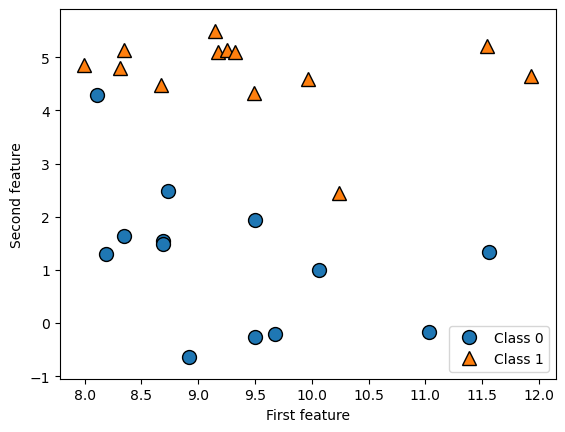

In [3]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

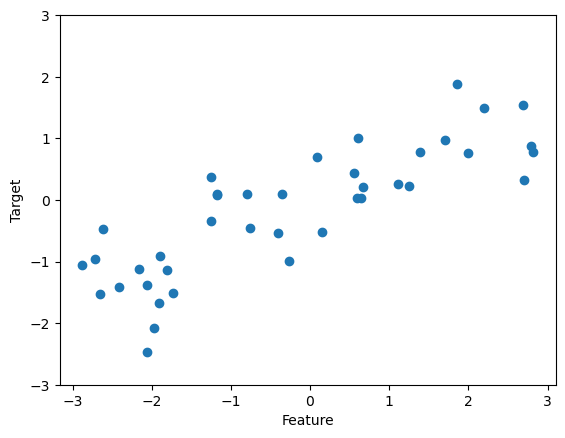

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# assuming n is the label and v is the count.

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

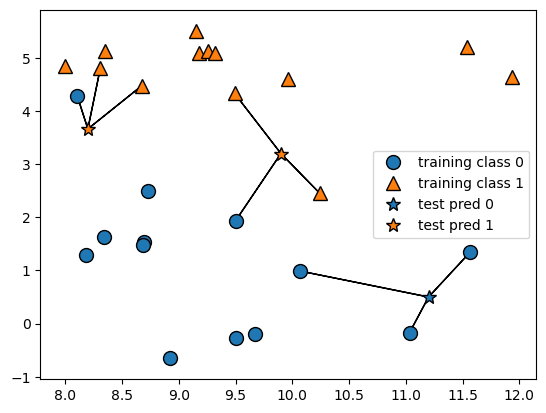

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print("Test set prediction: {}".format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


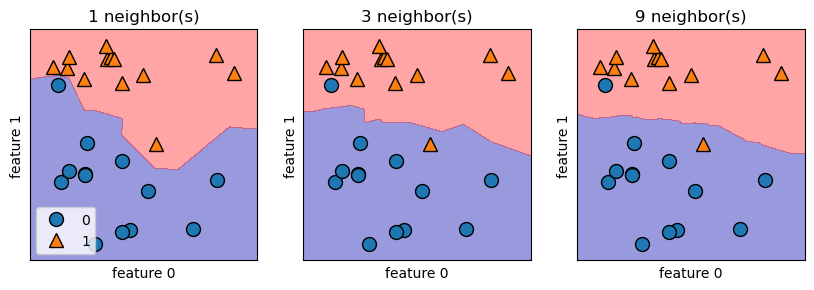

In [16]:
fig, axes = plt.subplots (1,3, figsize = (10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps= 0.5,ax = ax, alpha =.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

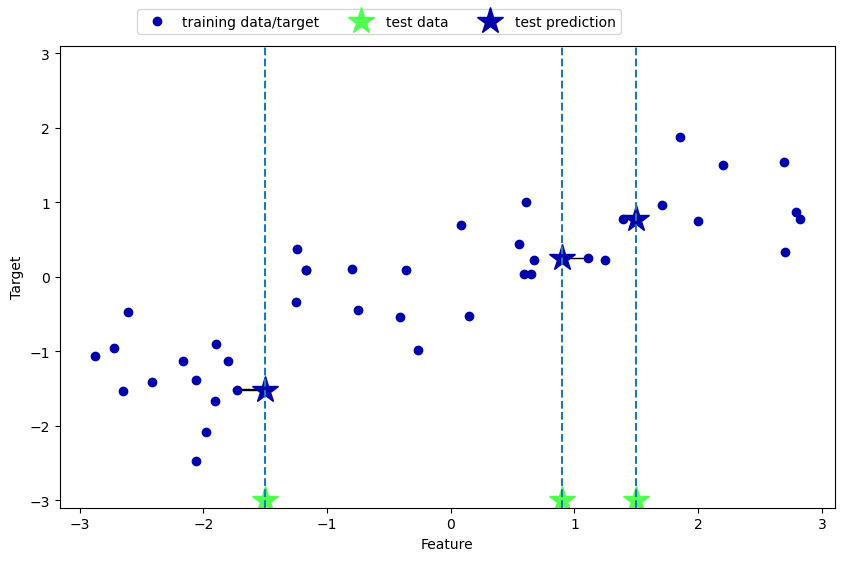

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

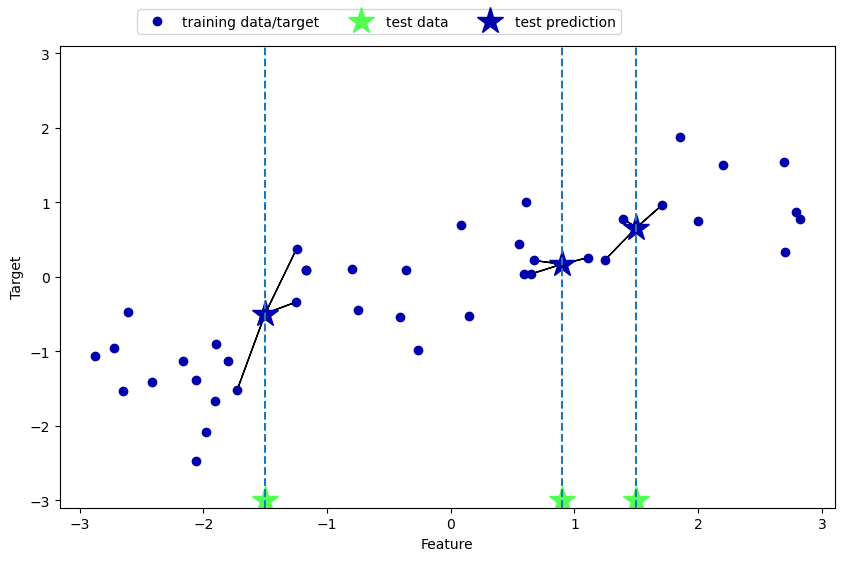

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit (X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


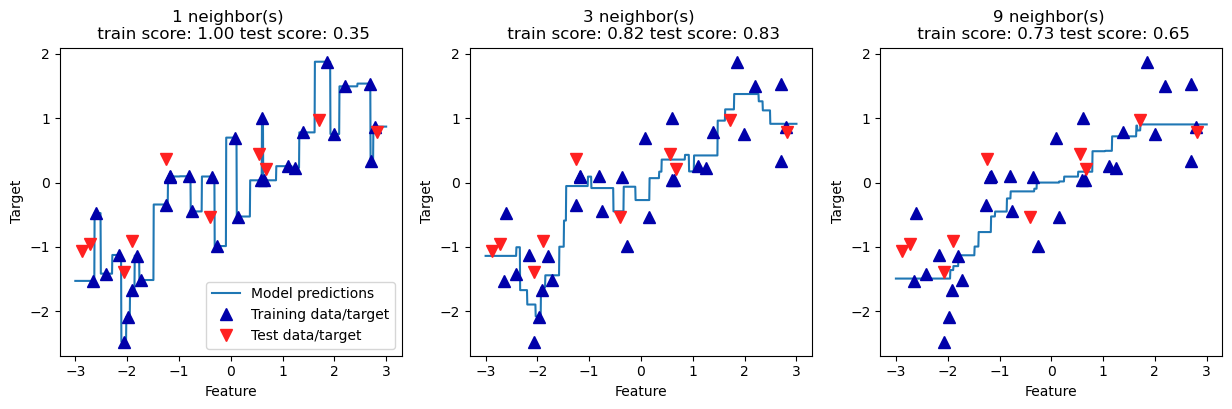

In [22]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# create a 1000 datapoints, evenly spaced b/w -3 and 3.
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9], axes):
    # make predictions using 1,3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c= mglearn.cm2(1),markersize = 8)

    ax.set_title(
        "{} neighbor(s) \n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc = "best")
    


w[0]: 0.393906  b: -0.031804


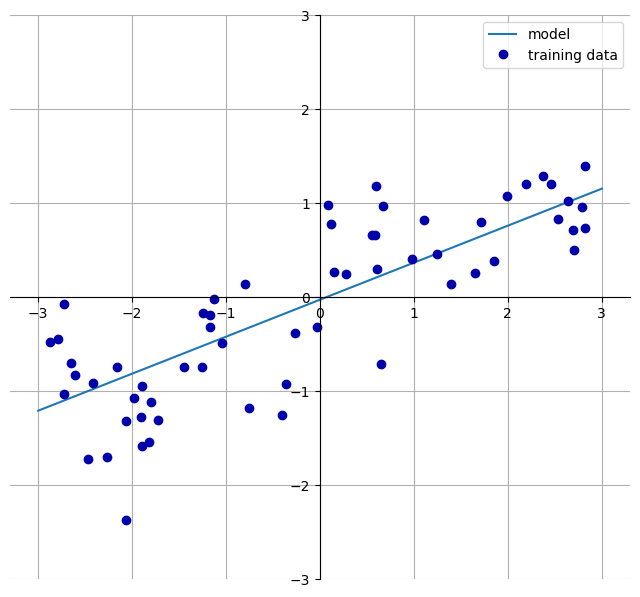

In [23]:
mglearn.plots.plot_linear_regression_wave()

In [24]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [25]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [27]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training sets score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training sets score: 0.89
Test set score: 0.75


In [30]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [31]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


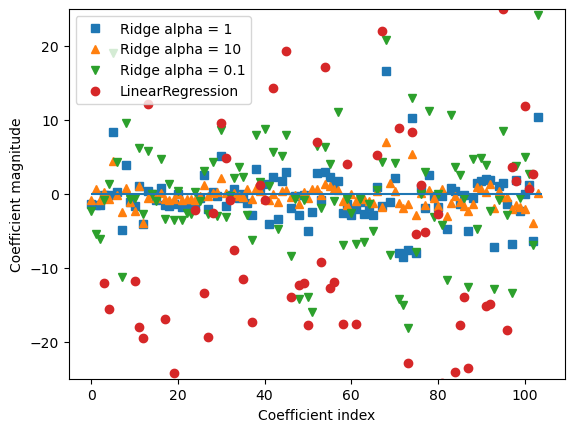

In [32]:
plt.plot(ridge.coef_, 's',label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

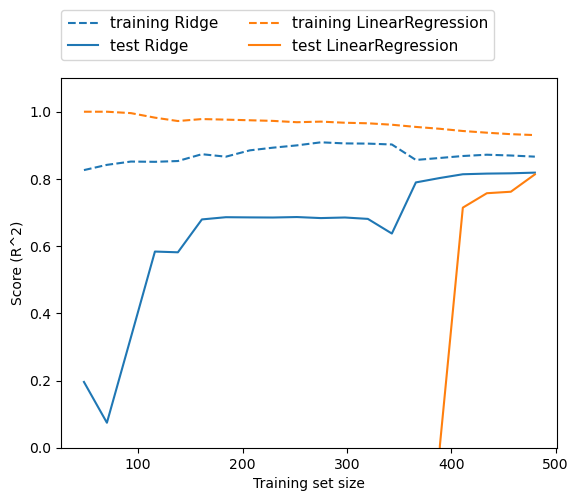

In [33]:
mglearn.plots.plot_ridge_n_samples()

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score : 0.29
Test set score : 0.21
Number of features used: 4


In [39]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score : 0.90
Test set score : 0.77
Number of features used: 33


In [40]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score : 0.95
Test set score : 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

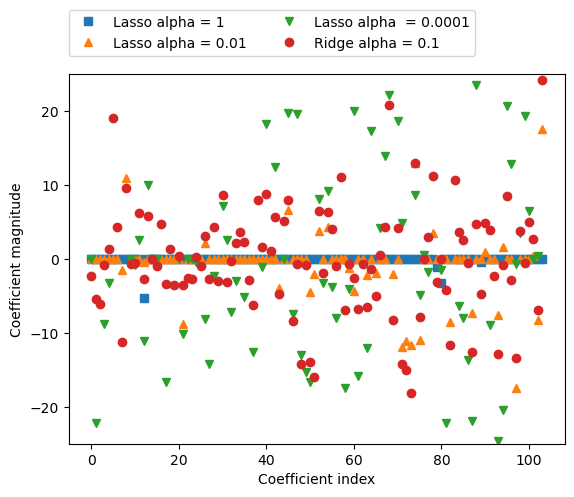

In [41]:
plt.plot(lasso.coef_, 's', label= "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha  = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

/usr/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


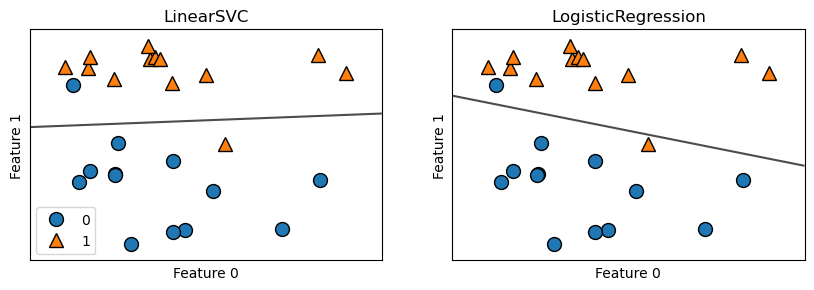

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()